## Exercício 4.9

Os estados e ações nesse ambiente são como os especificados no livro: $\mathcal{S}^+ = \{0, 1, \dots, 99, 100\}$, $\mathcal{A}(s) = \{0, \dots, \min(s, 100-s)\}$. Note que 0 (derrota) e 100 (vitória) são estados terminais, logo o conjunto de estados não-terminais é dado por $\mathcal{S} = \mathcal{S}^+ \setminus \{0, 100\}$. Abaixo são definidas funções que retornam esses conjuntos.

Abaixo também é definido o algoritmo Iteração de Valor. Note que a função-valor assume valor 0 nos estados terminais (derrota ou vitória) e só é atualizada para os estados não-terminais, onde é realizado o _Bellman backup_ com a equação de otimalidade de Bellman. A política só é derivada uma vez que a função-valor converge; aqui isso é considerado quando o erro absoluto máximo entre estimativas consecutivas é menor que uma tolerância pré-determinada.

A probabilidade de um jogada de moeda dar cara, $p_h$, é o principal parâmetro que governa a dinâmica desse MDP, e portanto é uma variável global configurável no código a seguir.

In [1]:
import numpy as np

GAMMA = 1
GOAL = 100
PROB_HEAD = 0.55

def states():
    return range(1, GOAL)

def states_plus():
    return range(GOAL + 1)

def actions(s):
    return range(min(s, GOAL - s) + 1)

def bellman_expectation(s, a, value):
    return PROB_HEAD*((1 if s+a == GOAL else 0) + value[s+a]) + (1 - PROB_HEAD)*(0 + value[s-a])

def value_iteration(accuracy):
    value = np.zeros(GOAL + 1)
    value[0], value[GOAL] = 0, 0
    delta = float('inf')
    while delta > accuracy:
        for s in states():
            old_value = value.copy()
            value[s] = np.max([bellman_expectation(s, a, value) for a in actions(s)])
            delta = np.max(np.abs(value - old_value))
        
    policy = np.zeros(GOAL + 1)
    for s in states():
        f = lambda a: np.round(bellman_expectation(s, a, value), 5)
#         valid_actions = list(actions(s))
#         policy[s] = valid_actions[np.argmax(np.round([bellman_expectation(s, a, value) for a in valid_actions], 5))]
        policy[s] = max(actions(s), key=f)
    return policy, value

## Reprodução do exemplo 4.3

Para reproduzir aproximadamente os resultados do exemplo 4.3, basta configurar $p_h = 0.4$.

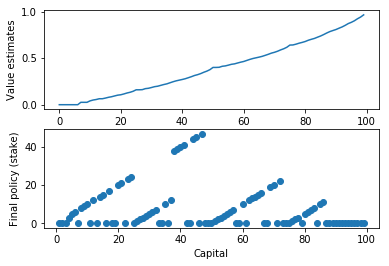

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_final(pi, vf):
    plt.subplot(2, 1, 1)
    plt.plot(value[:-1])
    plt.xlabel('Capital')
    plt.ylabel('Value estimates')

    plt.subplot(2, 1, 2)
    plt.scatter(np.array(states()), policy[states()])
    plt.xlabel('Capital')
    plt.ylabel('Final policy (stake)')
    plt.show()    

PROB_HEAD = 0.4

policy, value = value_iteration(1e-8)
plot_final(policy, value)

Note a figura mostra três valores máximos locais, assim como no exemplo 4.3. Entretanto, a forma da política é diferente, o que condiz com a afirmação do livro de que há diferentes políticas ótimas. A função-valor ótima aproxima bem os resultados do exemplo.

## Experimentos do exercício

A seguir seguem experimentos com $p_h = 0.25, 0.55$, como pedido pelo exercício, e diferentes níveis de tolerância para testar a robustez do algoritmo.

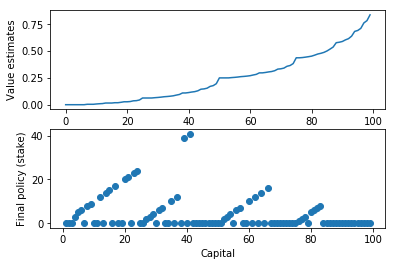

In [3]:
PROB_HEAD = 0.25

policy, value = value_iteration(1e-4)
plot_final(policy, value)

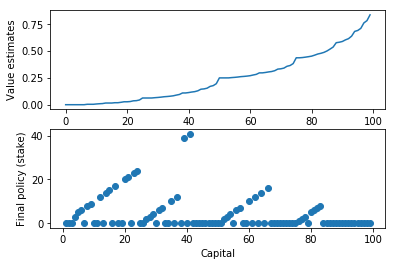

In [4]:
policy, value = value_iteration(1e-5)
plot_final(policy, value)

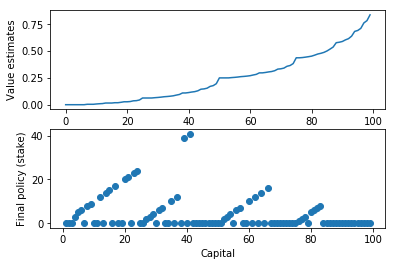

In [5]:
policy, value = value_iteration(1e-6)
plot_final(policy, value)

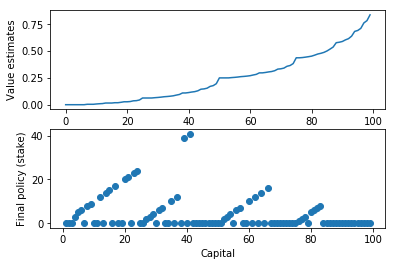

In [6]:
policy, value = value_iteration(1e-7)
plot_final(policy, value)

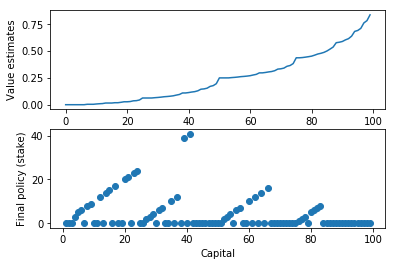

In [7]:
policy, value = value_iteration(1e-8)
plot_final(policy, value)

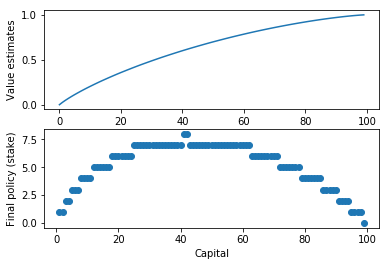

In [8]:
PROB_HEAD = 0.55

policy, value = value_iteration(1e-4)
plot_final(policy, value)

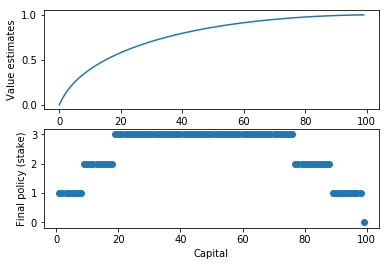

In [9]:
policy, value = value_iteration(1e-5)
plot_final(policy, value)

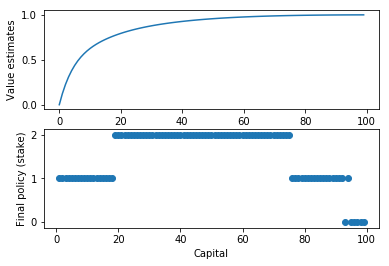

In [10]:
policy, value = value_iteration(1e-6)
plot_final(policy, value)

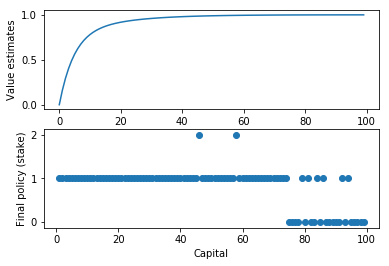

In [11]:
policy, value = value_iteration(1e-7)
plot_final(policy, value)

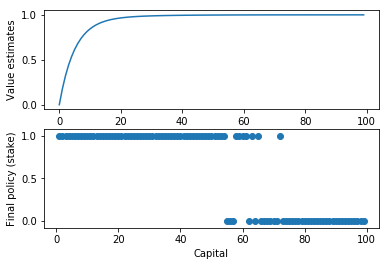

In [12]:
policy, value = value_iteration(1e-8)
plot_final(policy, value)

## Ordem importa

A seguir são reproduzidos os experimentos da última seção, mas tomando a maior ação que maximiza a equação de expectativa de Bellman para cada estado.

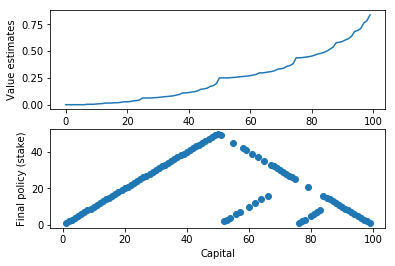

In [13]:
def actions(s):
    return reversed(range(min(s, GOAL - s) + 1))

PROB_HEAD = 0.25

policy, value = value_iteration(1e-4)
plot_final(policy, value)

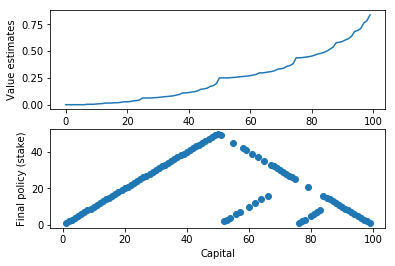

In [14]:
policy, value = value_iteration(1e-5)
plot_final(policy, value)

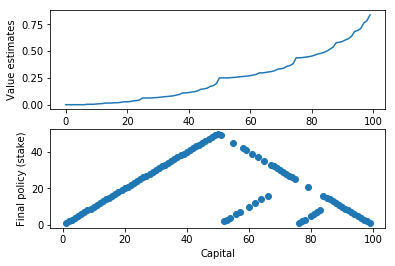

In [15]:
policy, value = value_iteration(1e-6)
plot_final(policy, value)

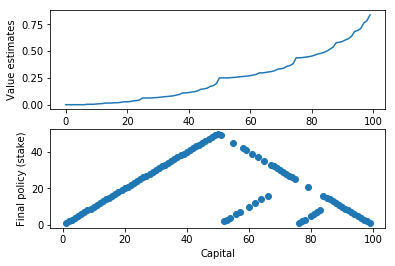

In [16]:
policy, value = value_iteration(1e-7)
plot_final(policy, value)

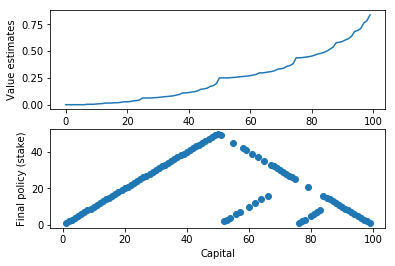

In [17]:
policy, value = value_iteration(1e-8)
plot_final(policy, value)

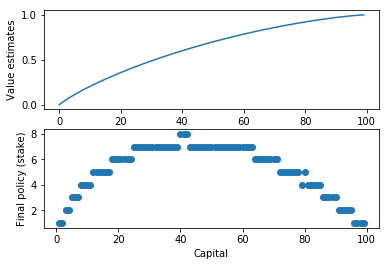

In [18]:
PROB_HEAD = 0.55

policy, value = value_iteration(1e-4)
plot_final(policy, value)

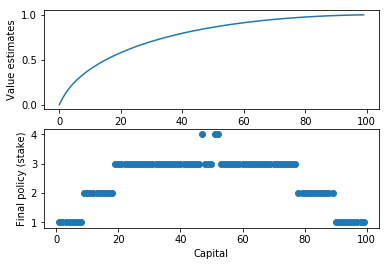

In [19]:
policy, value = value_iteration(1e-5)
plot_final(policy, value)

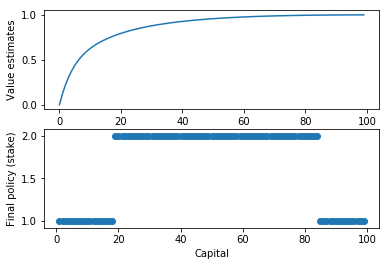

In [20]:
policy, value = value_iteration(1e-6)
plot_final(policy, value)

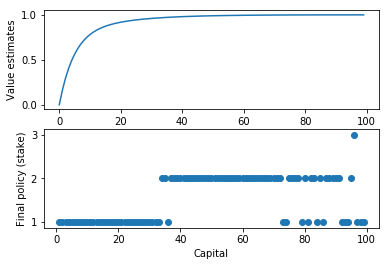

In [21]:
policy, value = value_iteration(1e-7)
plot_final(policy, value)

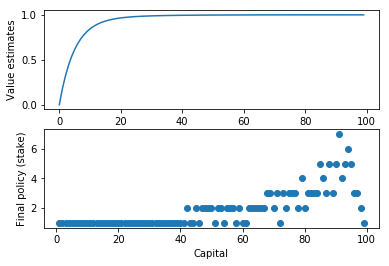

In [22]:
policy, value = value_iteration(1e-8)
plot_final(policy, value)